In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 불러오기

data = pd.read_csv("C:/Users/서우/Desktop/아이펠/bike-sharing-demand/train.csv")
train = data.copy()
train.shape #큰 구조 확인하기 

(10886, 12)

### EDA

In [3]:
#변수 확인하기
train.columns  # 다 오브젝트 형태?

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [4]:
# datetime 컬럼 자료형으로 변환하기

print(train['datetime'])  #어떤 식으로 구성되어 있나 먼저 확인: 년-월-일-시-분-초

train['datetime'] = pd.to_datetime(train['datetime'])  #dtype 바뀐 것 확인
print(train['datetime'].dtype)

train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['sec'] = train['datetime'].dt.second

#다시 컬럼 보기
train.head()

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object
datetime64[ns]


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,sec
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [5]:
# year은 뭐뭐 있나 보기
print(train['year'].unique())  #2012, 2011년 두 개의 데이터

[2011 2012]


<Axes: xlabel='sec', ylabel='count'>

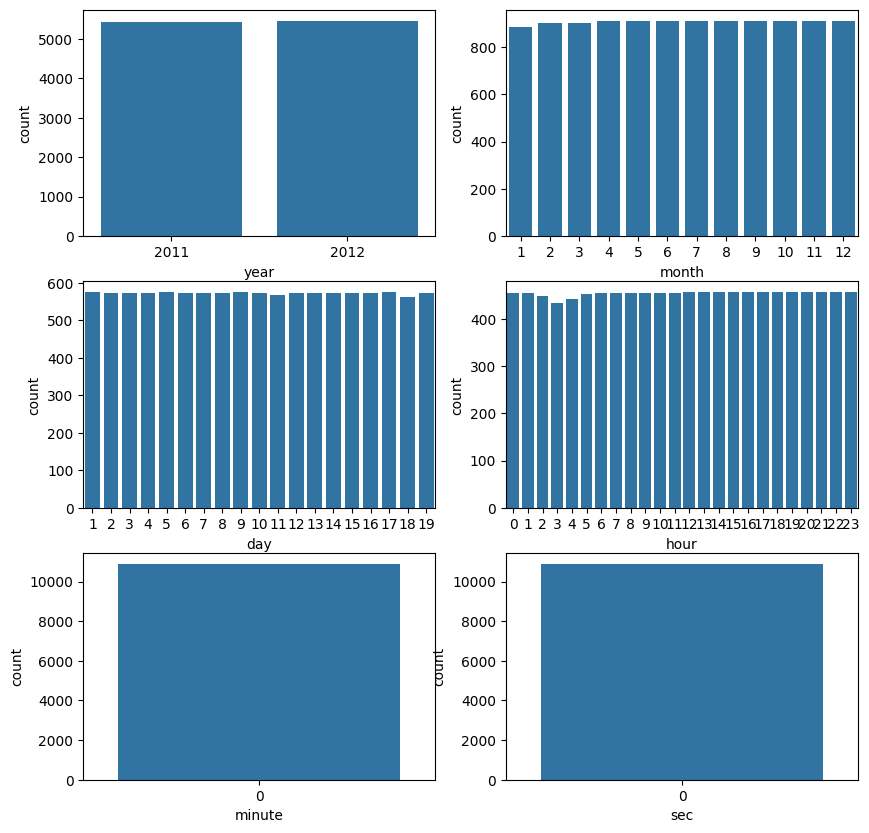

In [6]:
import seaborn as sns

fig, axes = plt.subplots(3,2, figsize = (10,10))


sns.countplot(ax = axes[0,0], x ="year", data = train)
sns.countplot(ax = axes[0,1], x ="month", data = train)
sns.countplot(ax = axes[1,0], x ="day", data = train)
sns.countplot(ax = axes[1,1], x ="hour", data = train)
sns.countplot(ax = axes[2,0], x ="minute", data = train)
sns.countplot(ax = axes[2,1], x ="sec", data = train)


In [7]:
#필요없는 칼럼 없애기 
train = train.drop(['minute', 'sec'], axis = 1)
train = train.drop(['datetime'], axis = 1)

In [8]:
train

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22


### 피처 엔지니어링

1. 먼저 **casual** 이랑 **registered** 더한 게 **count** 이므로, 두 개 삭제
2. **temp**랑 **atemp**는 사실상 같은 애니까, 둘 중 하나만 선택


In [9]:
# temp랑 atemp 중 좋은 거 골라보기
print(f"temp:\n{train['temp'].describe()}\natemp:\n{train['atemp'].describe()}")   #흠.. 별 차이가 없군.. atemp ㄱㄱ
train = train.drop(['temp', 'casual', 'registered'], axis = 1)

temp:
count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64
atemp:
count    10886.000000
mean        23.655084
std          8.474601
min          0.760000
25%         16.665000
50%         24.240000
75%         31.060000
max         45.455000
Name: atemp, dtype: float64


In [10]:
#다시 train.columns 확인하고, 이 아이들의 특징 다시 확인
train.columns

Index(['season', 'holiday', 'workingday', 'weather', 'atemp', 'humidity',
       'windspeed', 'count', 'year', 'month', 'day', 'hour'],
      dtype='object')

In [11]:
print(train['season'].unique())  #봄여름가을겨울
print(train['holiday'].unique()) # true false
print(train['workingday'].unique()) #true false
print(train['weather'].unique()) #맑음 흐림 눈 비 


[1 2 3 4]
[0 1]
[0 1]
[1 2 3 4]


In [12]:
# holiday면 workingday가 아닌가? 
train['holiday'] == train['workingday']  #그렇지는 않다. 

0         True
1         True
2         True
3         True
4         True
         ...  
10881    False
10882    False
10883    False
10884    False
10885    False
Length: 10886, dtype: bool

<Axes: xlabel='weather', ylabel='count'>

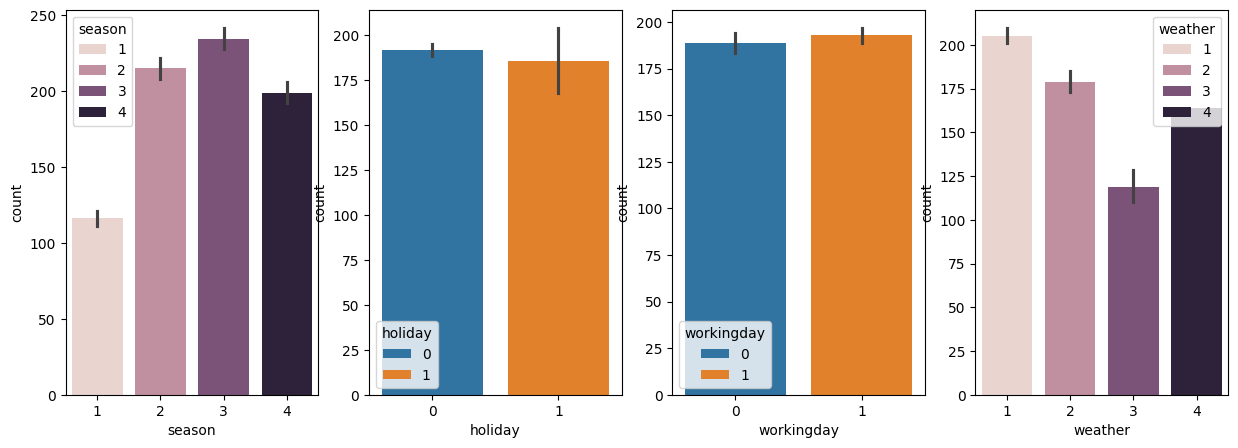

In [13]:
# 먼저, 명목변수_count EDA 해보기

fig, axes = plt.subplots(1,4, figsize = (15,5))

sns.barplot(ax = axes[0], x='season', y='count', hue='season', data=train)
sns.barplot(ax = axes[1], x='holiday', y='count', hue='holiday', data=train)
sns.barplot(ax = axes[2], x='workingday', y='count', hue='workingday', data=train)
sns.barplot(ax = axes[3], x='weather', y='count', hue='weather', data=train)


보아하니, holiday랑 workingday는 자전거 수요에 큰 영향을 주는 거 같지 않다.  
 이제는 year, month, day, hour도 보자!!

<Axes: xlabel='hour', ylabel='count'>

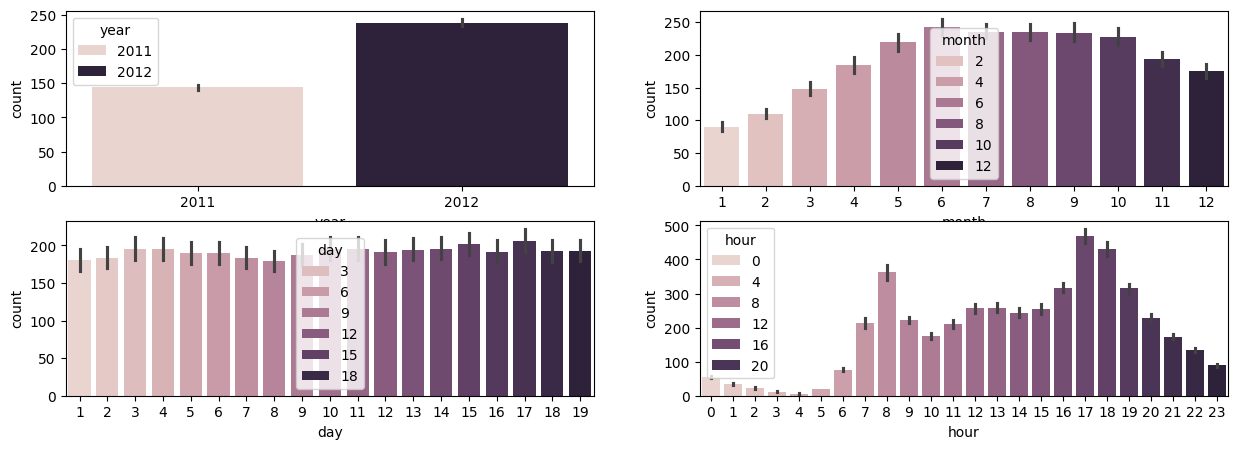

In [14]:
fig, axes = plt.subplots(2,2, figsize = (15,5))

sns.barplot(ax = axes[0,0], x='year', y='count', hue='year', data=train)
sns.barplot(ax = axes[0,1], x='month', y='count', hue='month', data=train)
sns.barplot(ax = axes[1,0], x='day', y='count', hue='day', data=train)
sns.barplot(ax = axes[1,1], x='hour', y='count', hue='hour', data=train)

이 친구들은 살려야 할 변수들로 보인다.... 

<Axes: xlabel='windspeed', ylabel='count'>

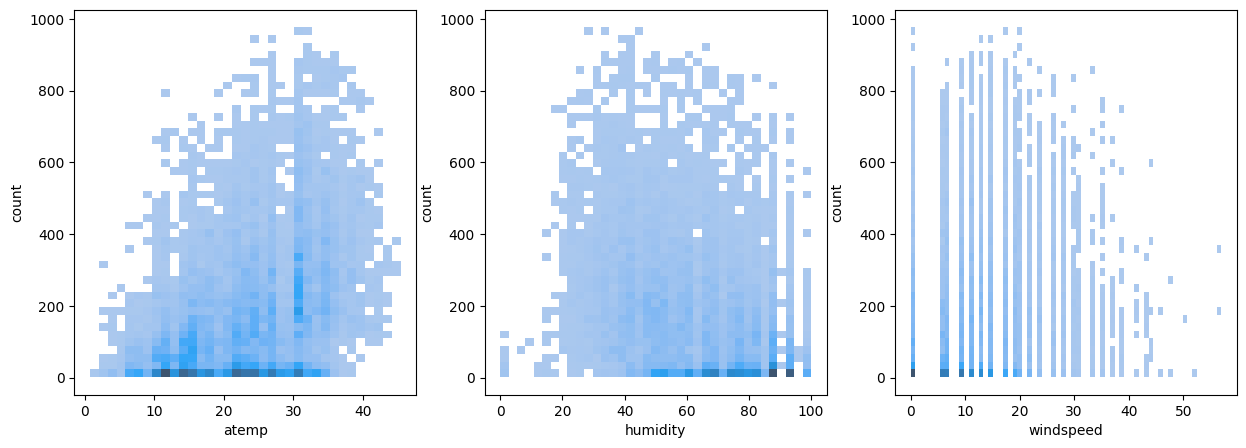

In [15]:
# 이제 연속변수 EDA 해보기


fig, axes = plt.subplots(1,3, figsize = (15,5))

sns.histplot(ax = axes[0], x='atemp', y='count',data=train)
sns.histplot(ax = axes[1], x='humidity', y='count', data=train)
sns.histplot(ax = axes[2], x='windspeed', y='count', data=train)


이 친구들은 정규화가 필요해 보인다...

In [16]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# train['atemp']를 2차원 배열로 변환
atemp_2d = np.array(train['atemp']).reshape(-1, 1)
humidity_2d = np.array(train['humidity']).reshape(-1, 1)
windspeed_2d = np.array(train['windspeed']).reshape(-1, 1)

# MinMaxScaler 객체 생성 및 데이터 변환
scaler = MinMaxScaler()
scaled_atemp = scaler.fit_transform(atemp_2d)
scaled_humidity = scaler.fit_transform(humidity_2d)
scaled_windspeed = scaler.fit_transform(windspeed_2d)
train['scaled_atemp'] = scaled_atemp
train['scaled_humidity'] = scaled_humidity
train['scaled_windspeed'] = scaled_windspeed


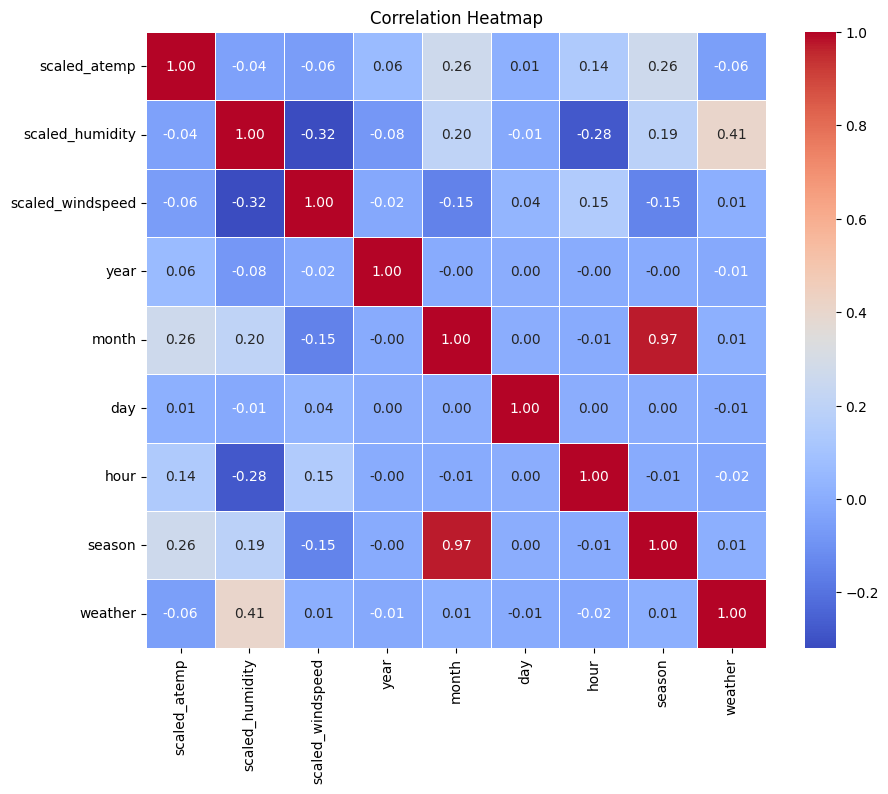

In [17]:
# 마지막으로 서로 상관관계가 큰지 확인 

# 상관 행렬 계산
correlation_matrix = train[['scaled_atemp', 'scaled_humidity', 'scaled_windspeed', 'year', 'month', 'day', 'hour', 'season', 'weather']].corr()

# heatmap 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

보아하니, season과 month가 상관관계가 큰 것으로 나온다. 따라서 season도 제외

In [18]:
train.columns
from sklearn.model_selection import train_test_split
#train/test 분리

X = train[['holiday', 'workingday', 'weather', 'scaled_atemp','scaled_humidity', 'scaled_windspeed','year', 'month', 'day']]
y = train['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
#학습하기
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()

model.fit(X_train, y_train)

y_pred_train = model.predict(X_test)

train_mse = mean_squared_error(y_test, y_pred_train, squared=True)
train_rmse = mean_squared_error(y_test, y_pred_train, squared=False)
print("Train RMSE:", train_rmse)
print("Train MSE:", train_mse)


Train RMSE: 149.21163028579065
Train MSE: 22264.110612543474


c:\python\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\python\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


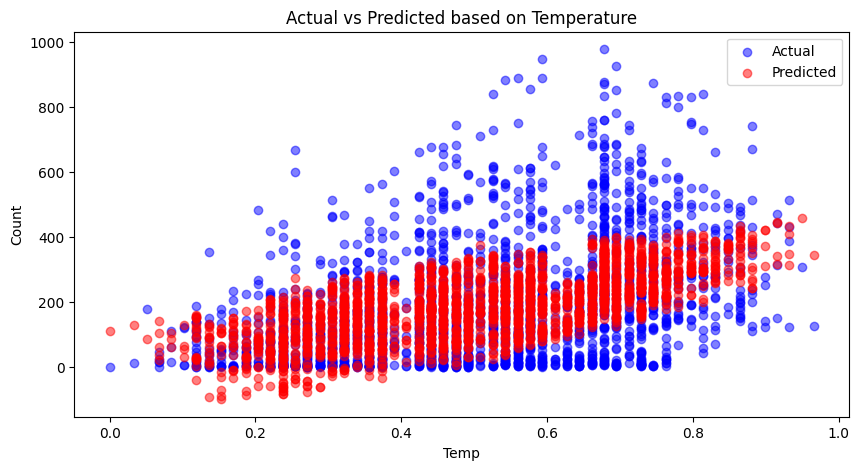

In [24]:

# x축에 X 데이터 중 `temp` 데이터를, y축에는 `count` 데이터를 넣어서 시각화하기
plt.figure(figsize=(10, 5))
plt.scatter(X_test['scaled_atemp'], y_test, label='Actual', alpha=0.5, color='blue')
plt.scatter(X_test['scaled_atemp'], y_pred_train, label='Predicted', alpha=0.5, color='red')
plt.xlabel('Temp')
plt.ylabel('Count')
plt.legend()
plt.title('Actual vs Predicted based on Temperature')
plt.show()

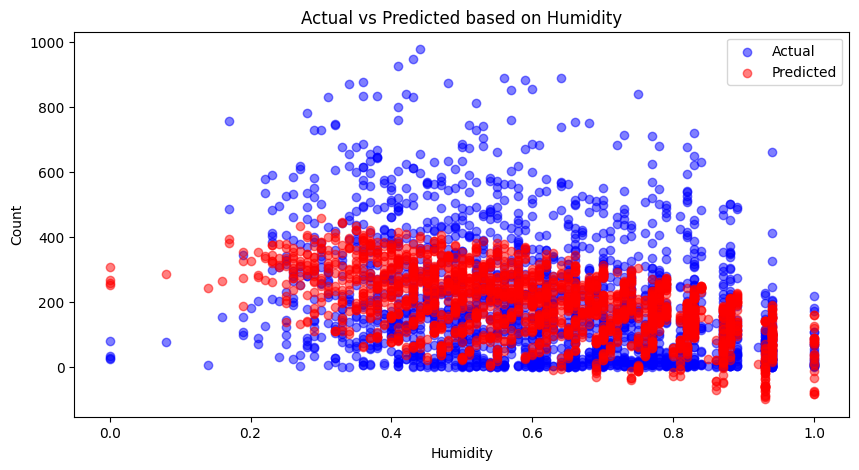

In [25]:
# x축에 X 데이터 중 `temp` 데이터를, y축에는 `count` 데이터를 넣어서 시각화하기
plt.figure(figsize=(10, 5))
plt.scatter(X_test['scaled_humidity'], y_test, label='Actual', alpha=0.5, color='blue')
plt.scatter(X_test['scaled_humidity'], y_pred_train, label='Predicted', alpha=0.5, color='red')
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.legend()
plt.title('Actual vs Predicted based on Humidity')
plt.show()